In [43]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [44]:
# Pandas read files
df_tesla = pd.read_csv("TESLA Search Trend vs Price.csv")

df_btc_search = pd.read_csv("Bitcoin Search Trend.csv")
df_btc_price = pd.read_csv("Daily Bitcoin Price.csv")
df_unemployments = pd.read_csv("UE Benefits Search vs UE Rate 2004-19.csv")


In [8]:
print(df_tesla.shape)
df_tesla.head()

(124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [10]:
print(f'The largest value in Tesla Web Search: {df_tesla.TSLA_WEB_SEARCH.max()}')
print(f'The smallest value in Tesla Web Search: {df_tesla.TSLA_WEB_SEARCH.min()}')

The largest value in Tesla Web Search: 31
The smallest value in Tesla Web Search: 2


In [12]:
# Unemployment data
print(df_unemployments.shape)
df_unemployments.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


In [19]:
print('Largest value for "Unemployemnt Benefits" '
      f'in Web Search: {df_unemployments.UE_BENEFITS_WEB_SEARCH.max()}')

Largest value for "Unemployemnt Benefits" in Web Search: 100


In [45]:
# Bitcoin data
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [23]:
print(f"The largest BTC News search: {df_btc_search.BTC_NEWS_SEARCH.max()}")

The largest BTC News search: 100


In [25]:
# DATA CLEANING
# Check for missing values
print(f'Missing values for Tesla?: {df_tesla.isna().values.any()}')
print(f'Missing values for U/E?: {df_unemployments.isna().values.any()}')
print(f'Missing values for Btc news?: {df_btc_search.isna().values.any()}')
print(f'Missin values for Btc price?: {df_btc_price.isna().values.any()}')

Missing values for Tesla?: False
Missing values for U/E?: False
Missing values for Btc news?: False
Missin values for Btc price?: True


In [29]:
print(f'Missing by ow many values?: {df_btc_price.isna().values.sum()}')
df_btc_price.loc[df_btc_price.isnull().any(axis=1)]

Missing by ow many values?: 2


,DATE,CLOSE,VOLUME
2148,2020-08-04,NaN,NaN


In [30]:
df_btc_price = df_btc_price.dropna(inplace=True)

In [47]:
# Convert strings to DateTime objects
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployments.MONTH = pd.to_datetime(df_unemployments.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)


In [40]:
# Check Conversion
df_tesla.MONTH.head()

0   2010-06-01
1   2010-07-01
2   2010-08-01
3   2010-09-01
4   2010-10-01
Name: MONTH, dtype: datetime64[ns]

In [50]:
# Convert from Daily to Monthly Data
df_btc_monthly = df_btc_price.resample('M', on='DATE').last()
df_btc_monthly.head()

,DATE,CLOSE,VOLUME
DATE,,,
2014-09-30,2014-09-30,386.944000,34707300.0
2014-10-31,2014-10-31,338.321014,12545400.0
2014-11-30,2014-11-30,378.046997,9194440.0
2014-12-31,2014-12-31,320.192993,13942900.0
2015-01-31,2015-01-31,217.464005,23348200.0


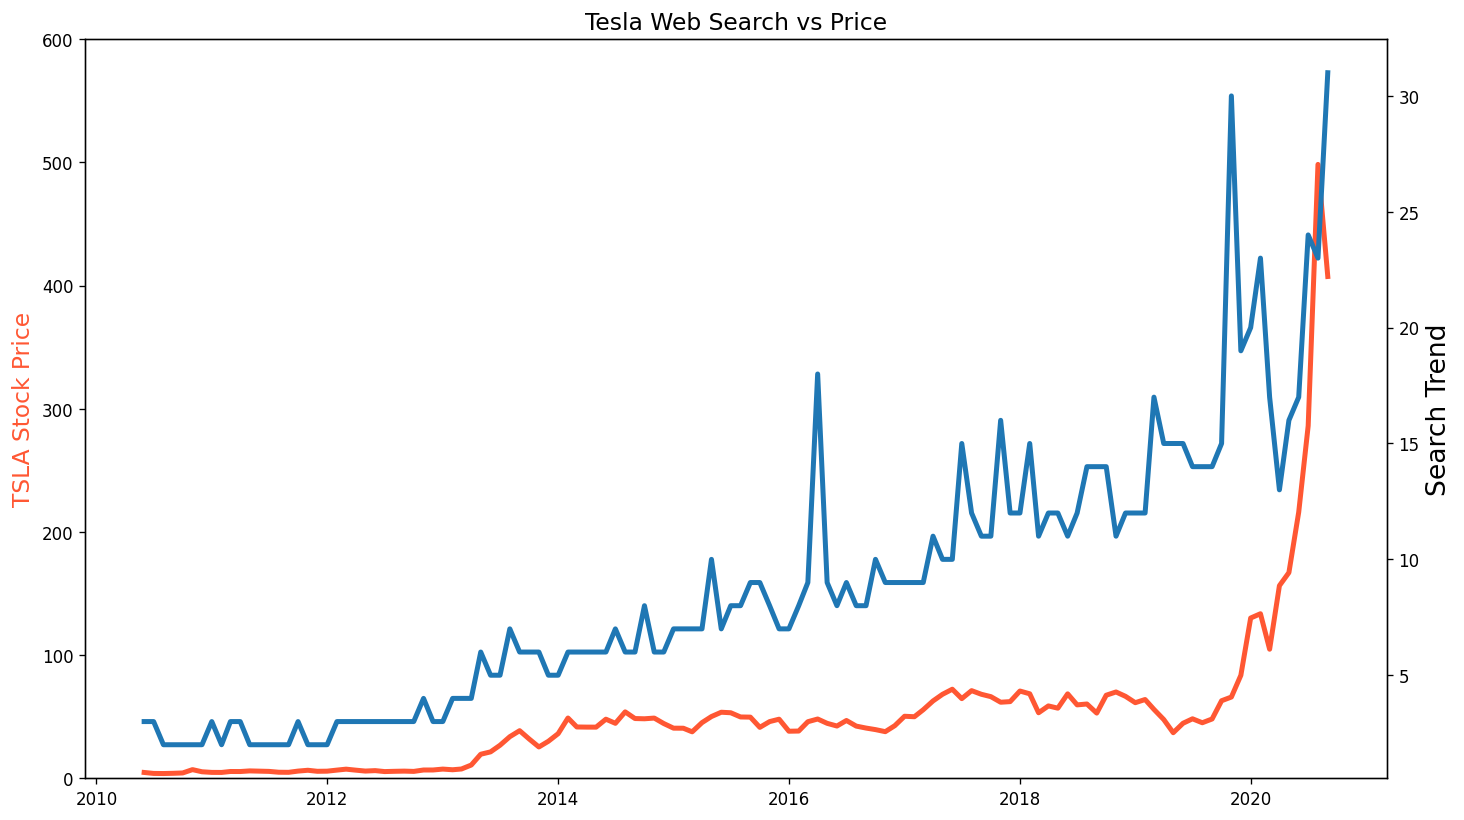

In [60]:
from turtle import color

# increases size and resolution
plt.figure(figsize=(14,8), dpi=120) 
plt.title('Tesla Web Search vs Price', fontsize=14)
ax1 = plt.gca() # get current axis
ax2 = ax1.twinx() #different y-axes
ax1.set_ylabel('TSLA Stock Price', color='#FF5733', fontsize=14)
ax2.set_ylabel('Search Trend', fontsize=16)
ax1.set_ylim([0, 600])
ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color='#FF5733', linewidth=3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, linewidth=3)
plt.show()